In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/yannie28/Global-Superstore/master/Global_Superstore%28CSV%29.csv"
df = pd.read_csv(url, encoding='latin1')  # لو ظهر مشكل في الترميز جرب utf-8 أو latin1

In [3]:
df.columns

Index(['ï»¿Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [4]:
df["Row ID"]=df["ï»¿Row ID"]

In [5]:
df.columns

Index(['ï»¿Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Row ID'],
      dtype='object')

In [6]:
df.head(2)

,ï»¿Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Row ID
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,40098
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,26341


In [7]:
df.drop("ï»¿Row ID", axis=1, inplace=True)

In [8]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Row ID
0,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,40098
1,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,26341


In [9]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Postal Code', 'City', 'State', 'Country',
       'Region', 'Market', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Row ID'],
      dtype='object')

In [10]:
df.isnull().sum()

Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Postal Code       806
City                0
State               0
Country             0
Region              0
Market              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
Row ID              0
dtype: int64

In [11]:
## لاحظت ان الرمز البريدي ناقص كتير لاكن مش مهم مش هيأثر علي الداتا في التحليل

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1000 non-null   object 
 1   Order Date      1000 non-null   object 
 2   Ship Date       1000 non-null   object 
 3   Ship Mode       1000 non-null   object 
 4   Customer ID     1000 non-null   object 
 5   Customer Name   1000 non-null   object 
 6   Segment         1000 non-null   object 
 7   Postal Code     194 non-null    float64
 8   City            1000 non-null   object 
 9   State           1000 non-null   object 
 10  Country         1000 non-null   object 
 11  Region          1000 non-null   object 
 12  Market          1000 non-null   object 
 13  Product ID      1000 non-null   object 
 14  Category        1000 non-null   object 
 15  Sub-Category    1000 non-null   object 
 16  Product Name    1000 non-null   object 
 17  Sales           1000 non-null   fl

In [13]:
df["Order Date"]

0      11/11/2014
1        2/5/2014
2      10/17/2014
3       1/28/2014
4       11/5/2014
          ...    
995      4/1/2015
996     12/9/2015
997    10/17/2014
998     1/19/2014
999    12/10/2015
Name: Order Date, Length: 1000, dtype: object

In [14]:
df["Ship Date"]

0      11/13/2014
1        2/7/2014
2      10/18/2014
3       1/30/2014
4       11/6/2014
          ...    
995      4/5/2015
996    12/13/2015
997    10/19/2014
998     1/26/2014
999    12/14/2015
Name: Ship Date, Length: 1000, dtype: object

In [15]:
# الخطوة 1: تحويل العمود لتاريخ
df["Order Date"] = pd.to_datetime(df["Order Date"], errors='coerce')
# الخطوة 2: استخراج رقم الشهر
df["month Order Date"] = df["Order Date"].dt.month


In [16]:
# الخطوة 1: تحويل العمود لتاريخ
df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors='coerce')
# الخطوة 2: استخراج رقم الشهر
df["month Ship Date"] = df["Ship Date"].dt.month

In [17]:
df["day Ship Date"] = df["Ship Date"].dt.day

In [18]:
df["day Order Date"] = df["Order Date"].dt.day

In [19]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,Row ID,month Order Date,month Ship Date,day Ship Date,day Order Date
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,2,0.0,62.15,40.77,High,40098,11,11,13,11
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,9,0.1,-288.77,923.63,Critical,26341,2,2,7,5


In [20]:
df["Sales"].mean()

np.float64(1710.97147)

In [21]:
df["Sales"].sum()

np.float64(1710971.47)

In [22]:
df["Quantity"].sum()

np.int64(5558)

In [23]:
df["Profit"].sum()

np.float64(288920.44000000006)

In [24]:
df["Shipping Cost"].mean()

np.float64(272.384897)

In [25]:
df["Shipping Time"]=df["day Ship Date"]-df["day Order Date"]

In [26]:
df["Shipping Time"].mean()

np.float64(0.037)

In [27]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Postal Code', 'City', 'State', 'Country',
       'Region', 'Market', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Row ID', 'month Order Date',
       'month Ship Date', 'day Ship Date', 'day Order Date', 'Shipping Time'],
      dtype='object')

In [28]:
to_product=df.groupby("Product ID")["Sales"].sum().sort_values(ascending=False).head()

In [29]:
df.groupby("Category")["Sales"].sum().sort_values(ascending=False).head()

Category
Technology         756983.02
Furniture          601492.31
Office Supplies    352496.14
Name: Sales, dtype: float64

In [30]:
df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False).head()

Sub-Category
Phones        417939.31
Appliances    289711.30
Bookcases     240688.73
Copiers       231104.67
Chairs        179648.44
Name: Sales, dtype: float64

In [31]:
df.groupby("Customer ID")["Sales"].sum().sort_values(ascending=False).head()

Customer ID
AB-101051402    12181.60
CA-1277558       9298.98
FH-1436582       8999.06
VG-2180558       8539.41
BF-1100558       8141.07
Name: Sales, dtype: float64

In [32]:
df["Customer ID"].value_counts().sort_values(ascending=False).head()

Customer ID
AS-100901406    12
AB-101051402    11
AS-100901402    11
AH-100751406    10
AH-101201404    10
Name: count, dtype: int64

In [33]:
df.groupby("Country")["Sales"].sum().sort_values(ascending=False).head()

Country
Australia    190368.52
China        160494.10
India        153805.65
France       135114.76
Germany       91884.49
Name: Sales, dtype: float64

In [34]:
df.groupby("Customer ID")["Sales"].sum().sort_values().head()

Customer ID
AS-101351404     4.18
AS-100901404    13.97
AH-101951402    16.03
AS-100901408    34.65
AB-101651402    37.30
Name: Sales, dtype: float64

In [35]:
correlation = df['Shipping Cost'].corr(df['Profit'])
print(f"معامل الارتباط بين تكلفة الشحن والربح: {correlation}")

معامل الارتباط بين تكلفة الشحن والربح: 0.2905929575848214


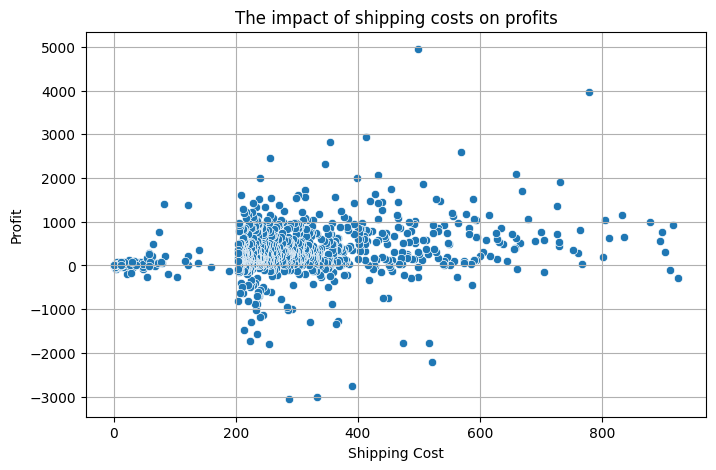

In [36]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Shipping Cost', y='Profit', data=df)
plt.title('The impact of shipping costs on profits')
plt.xlabel('Shipping Cost')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

In [37]:
df.groupby('Category')[['Shipping Cost', 'Profit']].mean()

,Shipping Cost,Profit
Category,,
Furniture,301.793399,252.113344
Office Supplies,188.948219,221.013656
Technology,307.047332,367.262481


In [38]:
df.groupby('Region')[['Shipping Cost', 'Profit']].mean()

,Shipping Cost,Profit
Region,,
Canada,15.748333,35.620000
Caribbean,284.876368,287.569474
Central Africa,354.385714,690.587143
Central America,311.560312,282.362987
Central US,25.610435,123.391739
Eastern Africa,386.960000,478.080000
Eastern Asia,332.489778,421.235111
Eastern Europe,336.306957,531.671739
Eastern US,21.746000,42.414833


In [39]:
loss_products = df[df['Profit'] < 0].groupby('Product Name')[['Sales', 'Profit']].sum()
loss_products = loss_products[loss_products['Sales'] > 1000].sort_values(by='Profit')


In [40]:
loss_products.to_csv("loss_products.csv")

In [41]:
top_customers = df.groupby('Customer Name')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False).head(10)

In [42]:
top_customers.to_csv("top_customers.csv")

In [43]:
df.groupby('Segment')[['Sales', 'Profit']].sum()

,Sales,Profit
Segment,,
Consumer,873512.42,158231.63
Corporate,524287.05,88901.38
Home Office,313172.00,41787.43


In [44]:
df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Profit')

,Sales,Profit
Region,,
Canada,887.01,213.72
Western Africa,15478.79,1278.17
Southern US,8360.75,1384.72
Western US,16729.95,2458.34
Eastern US,12256.44,2544.89
Eastern Africa,17387.94,4302.72
Southern Africa,22262.28,4876.32
Western Asia,33308.21,5262.35
Caribbean,30746.74,5463.82


<Axes: xlabel='Discount', ylabel='Profit'>

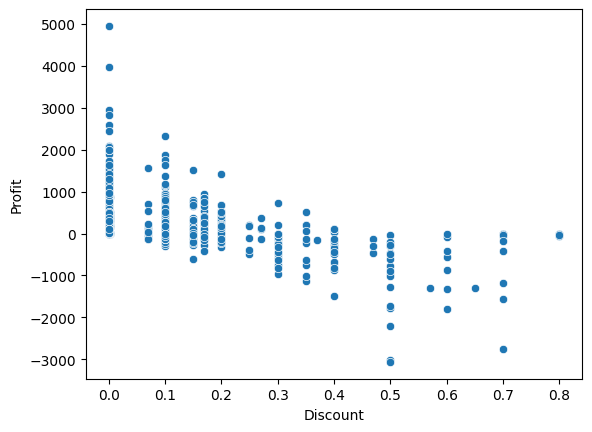

In [45]:

sns.scatterplot(data=df, x='Discount', y='Profit')


In [46]:
monthly_profit = df.groupby('month Order Date')['Profit'].sum()

In [47]:
monthly_profit.to_csv("monthly_profit.csv")

In [48]:
df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().sort_values(by='Profit')

Sales    Profit
Category        Sub-Category                     
Office Supplies Supplies        2037.92    -89.85
                Labels            54.79     21.86
                Envelopes        114.06     42.02
                Art              904.55    191.87
                Fasteners        513.44    246.47
Furniture       Furnishings     1862.26    408.24
Office Supplies Paper           1816.57    806.32
                Storage        37592.32   4490.04
                Binders        19751.19   7435.09
Technology      Accessories    36572.17   8641.96
                Machines       71366.87   8992.06
Furniture       Tables        179292.88  13051.69
                Chairs        179648.44  23245.88
                Bookcases     240688.73  45483.14
Office Supplies Appliances    289711.30  48518.99
Technology      Copiers       231104.67  52315.19
                Phones        417939.31  75119.47

In [49]:
df.to_csv("salis glopal.csv")

In [50]:
to_product.to_csv("to_product.csv")

In [54]:
negative_values =  df["Profit"][df["Profit"] < 0]

In [56]:
negative_values.to_csv("negative_values.csv")